In [38]:
import pandas
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('./cleveland.csv',header=None)
df.columns=['age','sex','cp','trestbps','chol',
    'fbs','restecg','thalach','exang',
    'oldpeak','slope','ca','thal','target']

df['target']=df.target.map({0:0,1:1,2:1,3:1,4:1})
df['thal']=df.thal.fillna(df.thal.mean())
df['ca']=df.ca.fillna(df.ca.mean())

In [9]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


<Axes: xlabel='age', ylabel='count'>

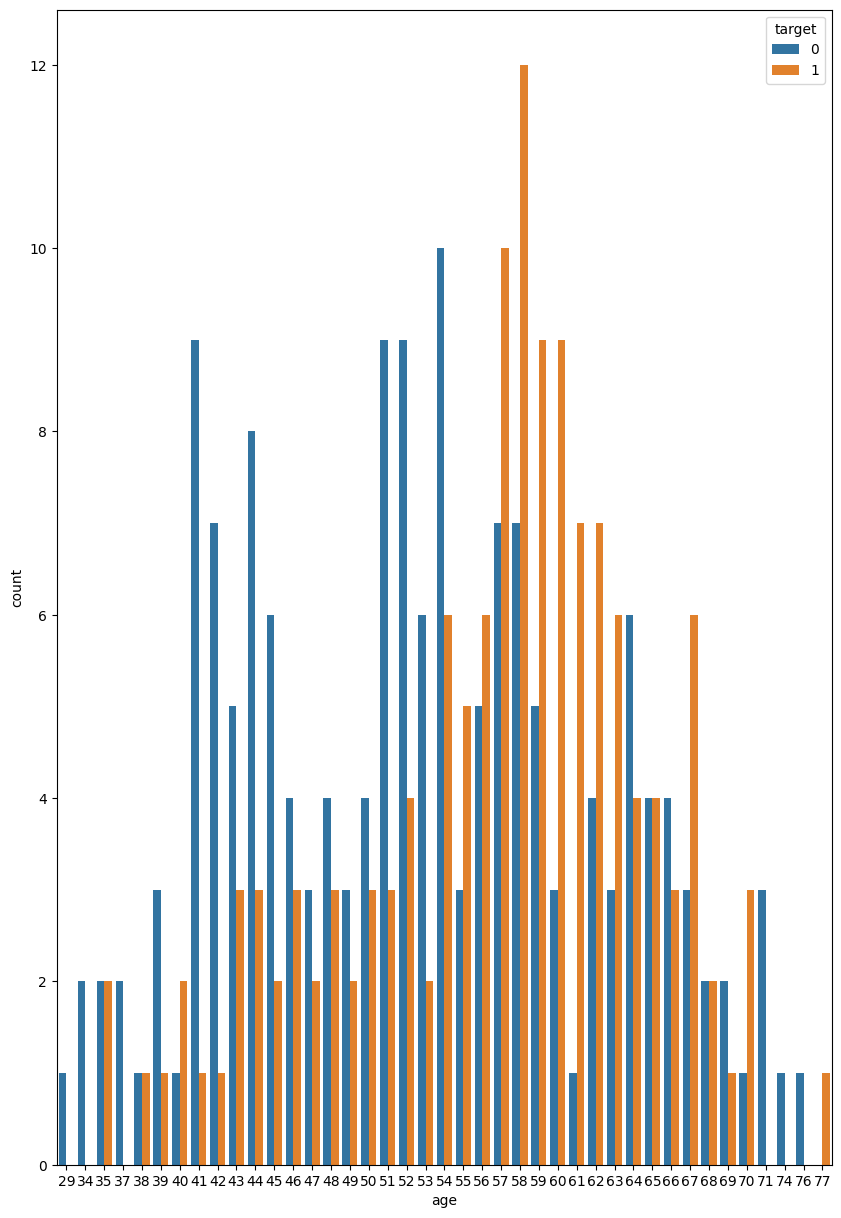

In [12]:
plt.figure(figsize=(10, 15))
sns.countplot(data=df, x='age', hue='target')

<Axes: xlabel='sex', ylabel='age'>

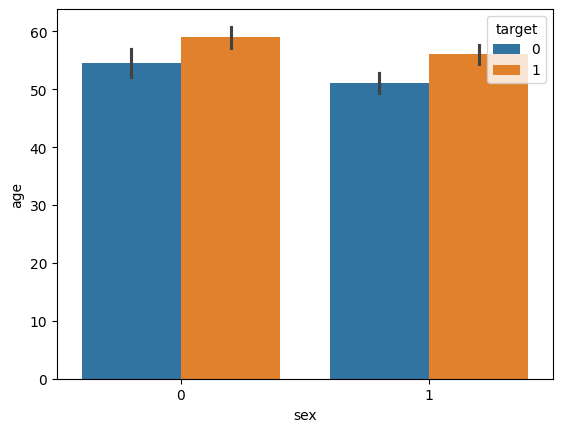

In [13]:
sns.barplot(
    data=df, x='sex', y='age', hue='target' 
)

In [42]:
from typing import List, Tuple
from pprint import pprint

def model_fit(
  models: List[Tuple[object, str]],
  X_train: np.ndarray,
  X_test: np.ndarray,
  y_train: np.ndarray,
  y_test: np.ndarray
) -> pd.DataFrame:
    
    """
    Fit multiple models, compute their accuracies, and return results in a DataFrame.

    Args:
    models (List[Tuple[object, str]]): List of tuples containing (model, model_name)
    X_train (np.ndarray): Training features
    X_test (np.ndarray): Test features
    y_train (np.ndarray): Training labels
    y_test (np.ndarray): Test labels

    Returns:
    pd.DataFrame: DataFrame containing model names and their accuracies
    """
    results = []
    for model, model_name in models:
        # Fit the model
        
        model.fit(X_train, y_train)

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        cm_train = confusion_matrix(y_train, y_train_pred)
        cm_test = confusion_matrix(y_test, y_test_pred)

        accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)  
        accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
        print()
        print("*" * 50)
        print(f"\nModel: {model_name}")
        print("Settings:")
        pprint(model.get_params())

        print('Accuracy for training set  = {}'.format(accuracy_for_train))
        print('Accuracy for test set = {}'.format(accuracy_for_test))
        print("*" * 50)
        # Store results
        results.append({
            'Model': model_name,
            'Train Accuracy': accuracy_for_train,
            'Test Accuracy': accuracy_for_test
        })

  # Create DataFrame from results
    return pd.DataFrame(results)

In [43]:
models_to_evaluate = [
  (KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski'), 'KNN'),
  (SVC(kernel='rbf', random_state=42), 'SVC'),
  (GaussianNB(), 'Naive Bayes'),
  (DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_split=2), "Decision Tree"),
  (RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10, random_state=42), 'Random Forest'),
  (AdaBoostClassifier(n_estimators=50, learning_rate=1.0), 'AdaBoost'),
  (GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3, random_state=42), 'Gradient Boost'),
  (XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100), 'XGBoost'),
]

In [44]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model_fit(
    models_to_evaluate,
    X_train= X_train,
    X_test = X_test,
    y_test= y_test,
    y_train= y_train
)


**************************************************

Model: KNN
Settings:
{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}
Accuracy for training set  = 0.76
Accuracy for test set = 0.69
**************************************************

**************************************************

Model: SVC
Settings:
{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}
Accuracy for training set  = 0.66
Accuracy for test set = 0.67
**************************************************

**************************************************

Model: Naive Bayes
Settings:
{'priors': None, 'var_smoothing': 1e-09}
Accuracy for training set  = 0.85
Accuracy for test s

d:\Applications\anaconda3\envs\AICChallenge2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



**************************************************

Model: AdaBoost
Settings:
{'algorithm': 'SAMME.R',
 'estimator': None,
 'learning_rate': 1.0,
 'n_estimators': 50,
 'random_state': None}
Accuracy for training set  = 0.91
Accuracy for test set = 0.84
**************************************************

**************************************************

Model: Gradient Boost
Settings:
{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 42,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}
Accuracy for training set  = 1.0
Accuracy for test set = 0.85
**************************************************

**************************************

,Model,Train Accuracy,Test Accuracy
0,KNN,0.76,0.69
1,SVC,0.66,0.67
2,Naive Bayes,0.85,0.84
3,Decision Tree,1.00,0.75
4,Random Forest,0.98,0.80
5,AdaBoost,0.91,0.84
6,Gradient Boost,1.00,0.85
7,XGBoost,1.00,0.87


In [45]:
dtc = DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn = KNeighborsClassifier()
xgb = XGBClassifier(random_state=42)
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel='rbf', random_state=42, probability=True)  # SVC needs probability=True for stacking
ad = AdaBoostClassifier(random_state=42)


In [46]:
estimators = [
  ('dtc', dtc),
  ('rfc', rfc),
  ('knn', knn),
  ('xgb', xgb),
  ('gc', gc),
  ('svc', svc),
  ('ad', ad)
]

In [51]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

stacking_classifier = StackingClassifier(
  estimators=estimators,
  final_estimator=LogisticRegression(random_state=42),
  cv=5  # 5-fold cross-validation
)
stacking_classifier.fit(X_train, y_train)

d:\Applications\anaconda3\envs\AICChallenge2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Applications\anaconda3\envs\AICChallenge2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Applications\anaconda3\envs\AICChallenge2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
d:\Applications\anaconda3\envs\AICChallenge2024\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be remov

StackingClassifier(cv=5,
                   estimators=[('dtc', DecisionTreeClassifier(random_state=42)),
                               ('rfc', RandomForestClassifier(random_state=42)),
                               ('knn', KNeighborsClassifier()),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categoric...
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...)),
                               ('gc',
                                GradientBoostingClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('ad', AdaBoostClassifier(random_state=42))],
                   final_estimator=LogisticRegression(random_state=42))

In [52]:
y_train_pred = stacking_classifier.predict(X_train)
y_test_pred = stacking_classifier.predict(X_test)

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1]) / len(y_train), 2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1]) / len(y_test), 2)
print('Accuracy for training set for Stacking = {}'.format(accuracy_for_train))
print('Accuracy for test set for Stacking = {}'.format(accuracy_for_test))


Accuracy for training set for Stacking = 1.0
Accuracy for test set for Stacking = 0.89
